# INSIGHTS NOTEBOOK

# Preliminar Data Wrangling

We used the following set of instructions to clean and prepare the dataset to perform our EDA.

In [1]:
# Importing python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading the dataset

df = pd.read_csv('202005-baywheels-tripdata.csv', low_memory=False)

In [3]:
# Making a list of weekend days for May 2020

weeked_days = [2, 3, 9, 10, 16, 17, 23, 24, 30, 31]

#Changing to datetime type
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

#Calculating ride time in seconds and chaging datatype to integer
df['ride_time'] = df['ended_at'] - df['started_at']
df['ride_time'] = df['ride_time'].dt.total_seconds()
df['ride_time'] = df['ride_time'].astype(int)

#Extracting day from date columns
df['day_started'] = pd.DatetimeIndex(df['started_at']).day
df['day_ended'] = pd.DatetimeIndex(df['ended_at']).day

#Calculating ride time in minutes
df['ride_time_min'] = df['ride_time']/60

#Calculating grouped datasets for further analyses
df_group_start_station = pd.DataFrame({'count' : df.groupby('start_station_name')['ride_id'].count()}).reset_index()
df_group_end_station = pd.DataFrame({'count' : df.groupby('end_station_name')['ride_id'].count()}).reset_index()

#Calculating boolean column for further anaylses
df['isweekend'] = df["day_started"].isin(weeked_days)


#Calculating additional columns to label each date as weekday or weekend day
for day in weeked_days:
    df.loc[ df['day_started'] != day, 'is_weekday_started' ] = 'weekday'
    df.loc[ df['day_started'] == day, 'is_weekday_started' ] = 'weekend'
    df.loc[ df['day_ended'] != day, 'is_weekday_ended' ] = 'weekday'
    df.loc[ df['day_ended'] == day, 'is_weekday_ended' ] = 'weekend'

# INSIGHTS

## Bay Wheels Data Analysis

### Investigation Overview

In this investigation, I wanted to look at what we can say about bike riding time. Further exploration of all the possibilities of the dataset was also performed.

## Dataset Overview

The data consists of information regarding 138251 bike rides on May 2020, including start and end timestamp ride, station location, latitudes and longitudes, and member and bike types. The dataset can be found here: https://www.lyft.com/bikes/bay-wheels/system-data.

## Riding Time Distribution by Member Type (May 2020)

The following distribution shows that casual members are more active in riding our bikes. This insight is especially useful since we should analyze our member services. The shape of the distribution is predictable since more riding time is usually less frequent.

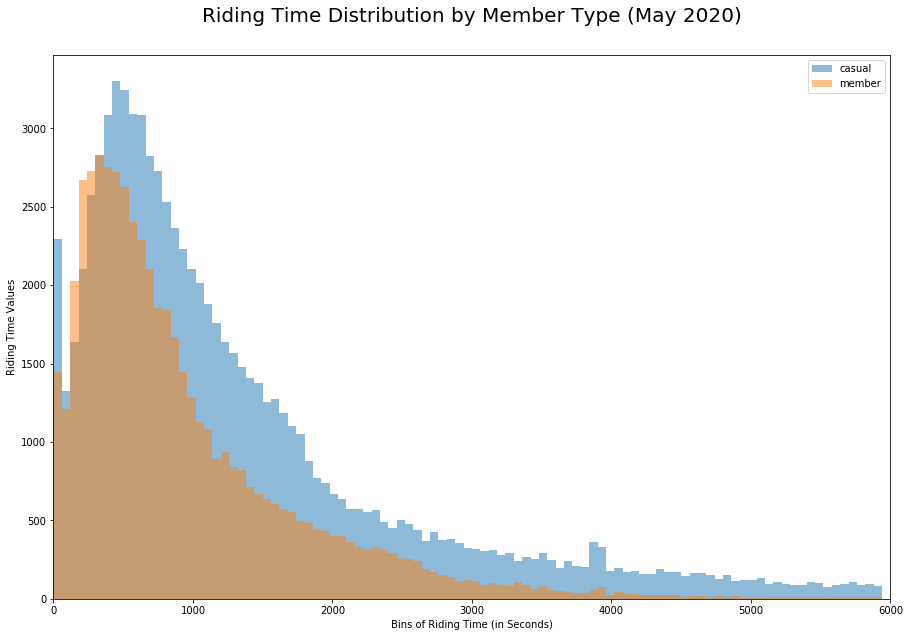

In [4]:
plt.figure(figsize=(15, 10))
bin_edges = np.arange(0, 6000, 60)
x = df.query('member_casual == "casual"')
y = df.query('member_casual == "member"')

plt.hist(data = x, x = 'ride_time', bins=bin_edges, label='casual', alpha=1/2)
plt.hist(data = y, x = 'ride_time', bins=bin_edges, label='member', alpha=1/2)
plt.legend(loc='upper right')
plt.xlim(0, 6000)

plt.title('Riding Time Distribution by Member Type (May 2020)', size=20)
plt.ylabel('Riding Time Values')
plt.xlabel('Bins of Riding Time (in Seconds)')

ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.05]);

## Total Riding Time in Minutes by Day (May 2020)

The following chart shows that riding time is higher than the total average on weekend days, meaning that those days have a lot of impact on the average. There is effectively just one weekday that is above the average.

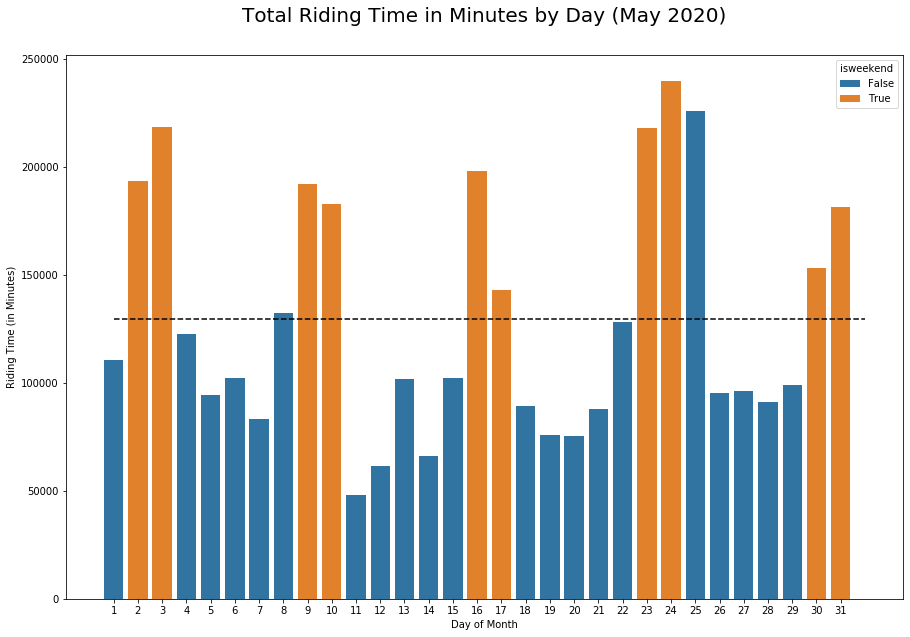

In [5]:
sumdays= pd.DataFrame({'total_minutes' : df.groupby('day_started')['ride_time_min'].sum()}).reset_index()
averagedays = sumdays['total_minutes'].mean()
x_coordinates = [0, 31]
y_coordinates = [averagedays, averagedays]

base_color = sns.color_palette()[0]
plt.figure(figsize=(15, 10))
sns.barplot(data = df, x = 'day_started', y = 'ride_time_min', hue = 'isweekend', dodge=False, estimator=sum, ci=None)
plt.plot(x_coordinates, y_coordinates, c='black', linestyle='--')
plt.ylabel('Riding Time (in Minutes)')
plt.xlabel('Day of Month')
plt.title('Total Riding Time in Minutes by Day (May 2020)', size=20)
ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.05]);

## Average Riding Time (in Minutes) by Member Type and Day Type (May 2020)

The following chart shows that average riding time for casual members is higher than for members both on weekdays and weekends. Average riding time is also higher on weekends for members than on weekdays.

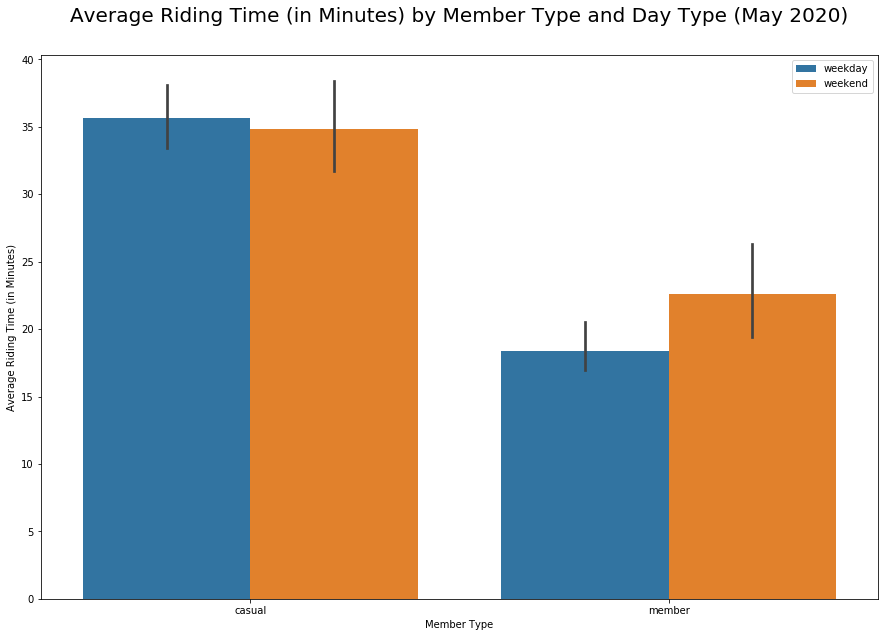

In [6]:
plt.figure(figsize=(15, 10))
sns.barplot(data = df, x = 'member_casual', y = 'ride_time_min', hue = 'is_weekday_started', estimator=np.mean)
plt.legend(title='')
plt.ylabel('Average Riding Time (in Minutes)')
plt.xlabel('Member Type')
plt.title('Average Riding Time (in Minutes) by Member Type and Day Type (May 2020)', size=20)
ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.05]);

## Top 15 Start Station Picks by Rider (May 2020)

In this chart, we can see that start station picks are highly concentrated on the top 5. While the other 10 are less used, even when they fit in the global top 15.

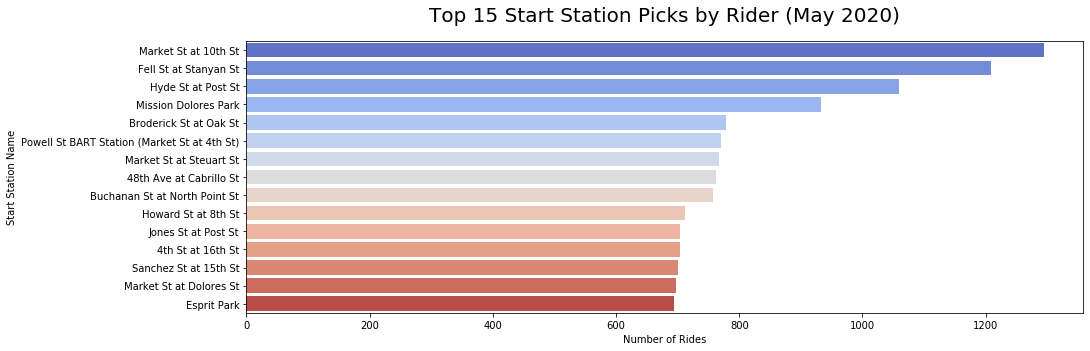

In [33]:
plt.figure(figsize=(15, 5))
df_group_start_station = df_group_start_station[:15]
sns.barplot(data = df_group_start_station, x = 'count', y = 'start_station_name', palette='coolwarm');
plt.ylabel('Start Station Name')
plt.xlabel('Number of Rides')
plt.title('Top 15 Start Station Picks by Rider (May 2020)', size=20)
ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.05]);

## Top 15 End Station Picks by Rider (May 2020)

On the contrary, in this chart, we can see that end station picks are more distributed across our global top 15. We should investigate the relationship between start and end stations with additional data.

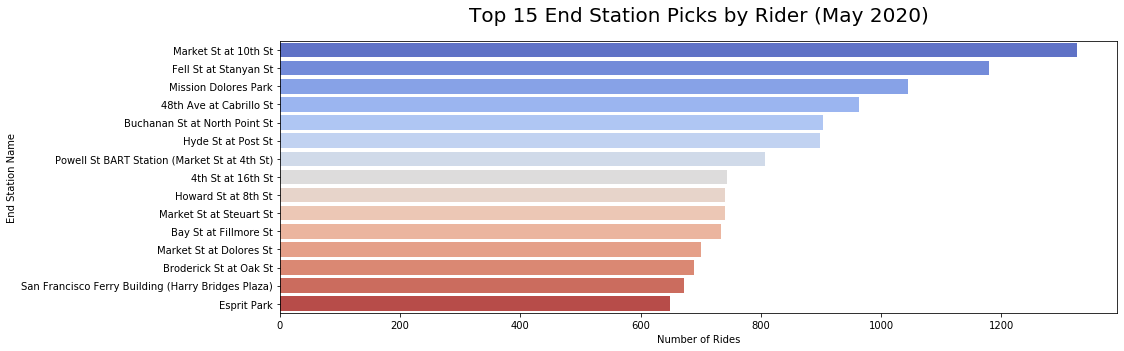

In [34]:
plt.figure(figsize=(15, 5))
df_group_end_station = df_group_end_station[:15]
sns.barplot(data = df_group_end_station, x = 'count', y = 'end_station_name', palette='coolwarm');
plt.ylabel('End Station Name')
plt.xlabel('Number of Rides')
plt.title('Top 15 End Station Picks by Rider (May 2020)', size=20)
ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.05]);